# Семинар 4: элементы стохастического анализа

Используя различные типы сходимости ("почти наверное", в среднем квадратичном, по вероятности, по распределению), можно ввести стохастические аналоги **непрерывности**, **дифференцируемости** и **интегрируемости**. Мы в основном будем пользоваться определениями, основанными на сходимости в среднем квадратичном.

Пользуясь связью потраекторного интеграла и интеграла Римана в среднем квадратичном, промоделируем следующий случайный процесс:
$$
    X_t = \int\limits_0^t W_s \, ds
$$

In [1]:
import numpy as np
import pandas as pd

# Фиксируем зерно для генертора случайных чисел.
np.random.seed(seed=42)

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

font = {'size'   : 14}
matplotlib.rc('font', **font)

In [3]:
# Раскомментировать, если следующая ячейка не работает.
#import sys
#sys.path.insert(1, ".")

In [4]:
from utils.plots import plot_realizations, plot_slices, plot_correlation_function

In [5]:
from scipy.stats import norm

In [6]:
def generate_wiener_integral_sp(T, realizations_number=25):
    """
    Сгенерировать realizations_number реализаций винеровского процесса наивным методом.
    """
    
    T = np.sort(T)
    realizations = np.zeros((realizations_number, T.shape[0]))
    
    # Для каждого очередного момента времени производится независимая генерация произошедших
    # на пройденном интервале скачков согласно бернуллиевскому распределению с параметром p = 0.5.
    # Величина скачков определяется \sqrt{\Delta t}.
    step_rv = norm()
    for index in range(T.shape[0] - 1):
        realizations[:,index + 1] = realizations[:,index] + np.sqrt(T[index+1] - T[index])*step_rv.rvs((realizations_number))
        
    # Воспользуемся формулой трапеций.
    dT = T[1:] - T[:-1]
    realizations[:,1:] = np.cumsum(0.5 * (realizations[:,1:] + realizations[:,:-1]) * dT, axis=1)
    realizations[:,0] = 0.0
    
    return realizations

In [7]:
T_1 = np.linspace(0.0, 10.0, 100)
wiener_integral_sp = generate_wiener_integral_sp(T_1, realizations_number=10)

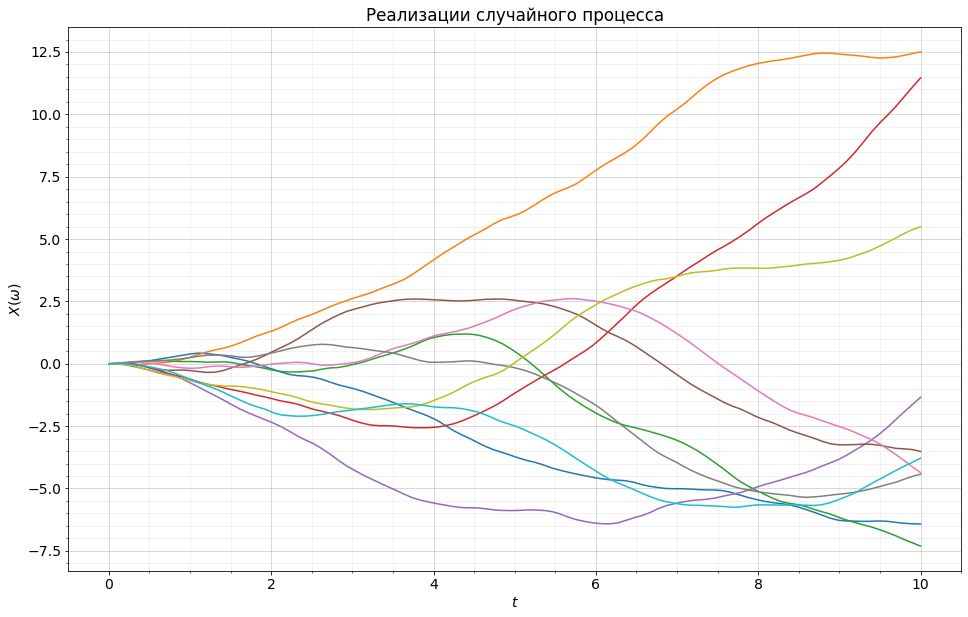

In [8]:
plot_realizations(T_1, wiener_integral_sp)